## Credit Card Fraud Analysis
This is a credit card fraud data set from Kaggle. Below is the link for this data set. 

https://www.kaggle.com/mlg-ulb/creditcardfraud


All names and personal information have been excluded from this data set due to privacy concern. Data have been reduced and transformed using PCA, except 'Time' and 'Amount'. The 'Class' feature in this data set represent whether this transation is a fraud(1) or non-fraud(0). 

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#df = pd.read_csv('creditcard.csv')
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The transformed and combined features are labeled as 'V1' ~ 'V28'

In [4]:
print('Shape of data set: ' + str(df.shape))
print('Total Number of null value in data set: ' + str(df.isnull().sum().sum()))
print('Total Number of Fraud Transaction: ' + str(df['Class'].value_counts()[1]))
print('Total Number of non-Fraud Transaction: ' + str(df['Class'].value_counts()[0]))
print('Percentage of Fraud Transaction ' + str(round(((df['Class'].value_counts()[1])/len(df))*100, 2)) + '%')
print('Percentage of non-Fraud Transaction ' + str(round(((df['Class'].value_counts()[0])/len(df))*100, 2)) + '%')

Shape of data set: (284807, 31)
Total Number of null value in data set: 0
Total Number of Fraud Transaction: 492
Total Number of non-Fraud Transaction: 284315
Percentage of Fraud Transaction 0.17%
Percentage of non-Fraud Transaction 99.83%


Looking at the percentage of fraud and non-fraud transactions, we can clearly see that our data set is extremely imbalance. extremely imbalance data set is not good for classifiers. This is because the model trained using this extremely imbalanced data set will be veery bias, and more likely to classify fraud transactions as non-fraud transactions. 

For imbalanced data set, we normally have several ways to enhance our data set, including 1) additional sampling, especially focus on sampling additional fraud transaction observations. 2) Under-sampling the majority class, to match the observation of the minority class. 3) Random over-sampling the minority class, to match the observation of the majority class. 

For this practice, we certainly cannot resample the data to get additional fraud transaction observations. We will be using the under-sampling technique to balance our data set for this practice. Also, logistic regression will be used as our prediction model. 

Before we proceed with balance our data set and fitting the logistic model for our data set, we will normalized our 'Time' and 'Amount' feature first.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [0]:
# Before balancing the data set, let's shuffle the data set first. 
from sklearn.utils import shuffle

df = shuffle(df, random_state = 0)

# Next, we balance our data set, so that we have 50/50 for both classes. 
df_Fraud = df.loc[df['Class'] == 1]
df_nonFraud = df.loc[df['Class'] == 0][:492]

sampled_df = pd.concat([df_Fraud, df_nonFraud])

In [8]:
print('Shape of balanced data set: ' + str(sampled_df.shape))
print('Total Number of Fraud Transaction in Balanced Data set: ' + str(sampled_df['Class'].value_counts()[1]))
print('Total Number of non-Fraud Transaction in Balanced Data set: ' + str(sampled_df['Class'].value_counts()[0]))
print('Percentage of Fraud Transaction in Balanced Data set ' + str(round(((sampled_df['Class'].value_counts()[1])/len(sampled_df))*100, 2)) + '%')
print('Percentage of non-Fraud Transaction in Balanced Data set ' + str(round(((sampled_df['Class'].value_counts()[0])/len(sampled_df))*100, 2)) + '%')

Shape of balanced data set: (984, 31)
Total Number of Fraud Transaction in Balanced Data set: 492
Total Number of non-Fraud Transaction in Balanced Data set: 492
Percentage of Fraud Transaction in Balanced Data set 50.0%
Percentage of non-Fraud Transaction in Balanced Data set 50.0%


Now we have balanced our data set. Next, we can split our balanced data set and try to fit our Logistic regression model. We will combine the Logistic regression model with gridsearchCV here to find the best paramater and the best score. 

In [0]:
from sklearn.model_selection import train_test_split

X = sampled_df.drop('Class', axis=1)
Y = sampled_df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr_params = {'penalty':['l1', 'l2'], 'fit_intercept':[True, False], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, Y_train)

print(('The best parameters for this model is: {}\n'
      'The best score for this model is: {}').format(lr_grid.best_params_, lr_grid.best_score_))

The best parameters for this model is: {'C': 10, 'fit_intercept': True, 'penalty': 'l2'}
The best score for this model is: 0.9440914866581956


According to GridSearchCV, now we get our tuned paramters. Next, we will fit out model in the training data one more time, and then predict the outcome on our test data set, re-sampled data set, and full data set. We will use a confusion matrix here to check how our model perform. 

In [0]:
X_full = df.drop('Class', axis=1)
Y_full = df['Class']

log_r = LogisticRegression(C = 0.1, fit_intercept=True, penalty='l1')
Y_pred = log_r.fit(X_train, Y_train).predict(X)
Y_pred_test = log_r.fit(X_train, Y_train).predict(X_test)
Y_pred_full = log_r.fit(X_train, Y_train).predict(X_full)

In [0]:
from sklearn.metrics import confusion_matrix

lr_rm_cf = confusion_matrix(Y, Y_pred)
lr_test_cf = confusion_matrix(Y_test, Y_pred_test)
lr_full_cf = confusion_matrix(Y_full, Y_pred_full)

[Text(0, 0.5, 'Fraud'), Text(0, 1.5, 'Non-Fraud')]

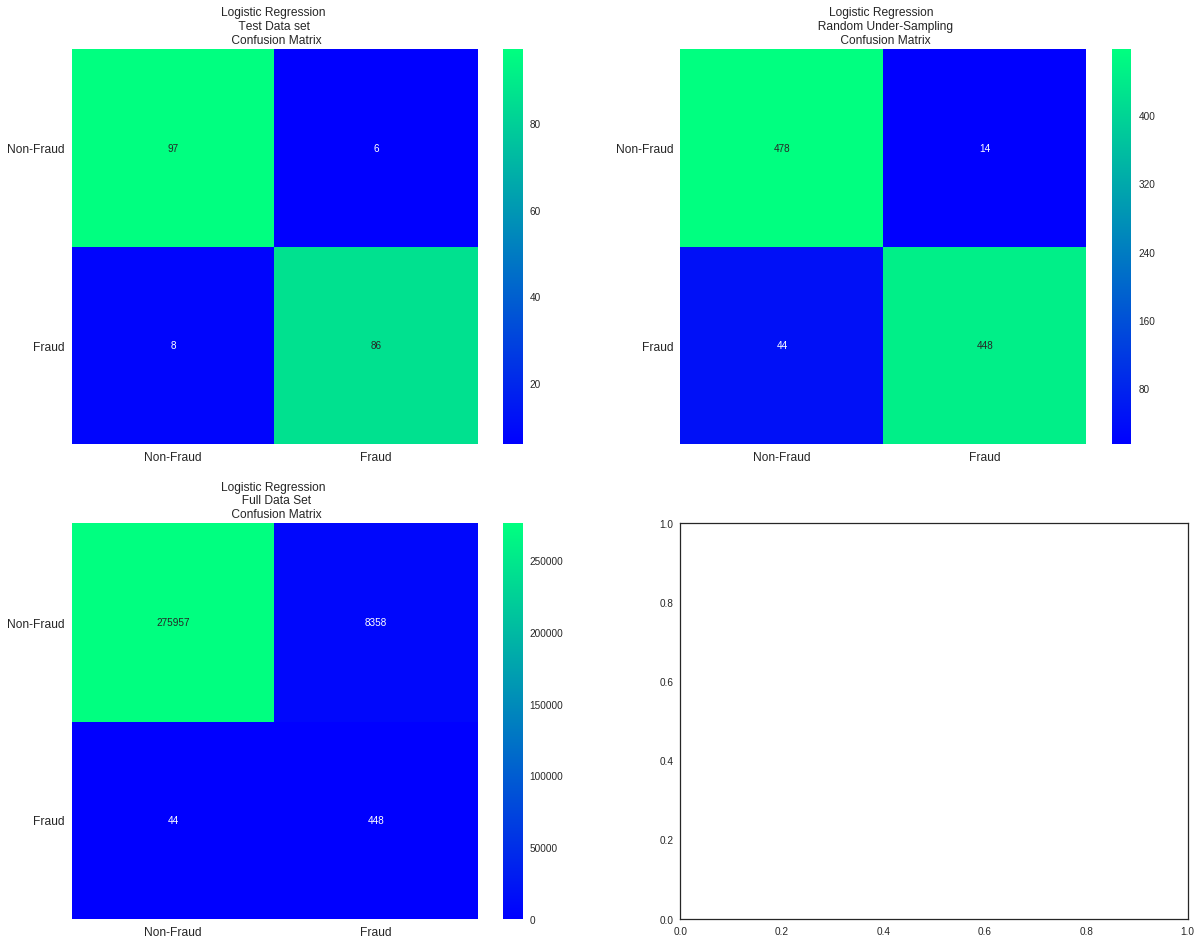

In [15]:
fig, ax = plt.subplots(2, 2,figsize=(20,16))

sns.heatmap(lr_test_cf, ax=ax[0][0], annot=True, cmap=plt.cm.winter, fmt="d")
ax[0, 0].set_title("Logistic Regression \n Test Data set \n Confusion Matrix", fontsize=12)
ax[0, 0].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12, rotation=0)
ax[0, 0].set_yticklabels(['Fraud', 'Non-Fraud'], fontsize=12, rotation=360)

sns.heatmap(lr_rm_cf, ax=ax[0][1], annot=True, cmap=plt.cm.winter, fmt="d")
ax[0, 1].set_title("Logistic Regression \n  Random Under-Sampling \n Confusion Matrix", fontsize=12)
ax[0, 1].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12, rotation=0)
ax[0, 1].set_yticklabels(['Fraud', 'Non-Fraud'], fontsize=12, rotation=360)

sns.heatmap(lr_full_cf, ax=ax[1][0], annot=True, cmap=plt.cm.winter, fmt="d")
ax[1, 0].set_title("Logistic Regression \n  Full Data Set \n Confusion Matrix", fontsize=12)
ax[1, 0].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12, rotation=0)
ax[1, 0].set_yticklabels(['Fraud', 'Non-Fraud'], fontsize=12, rotation=360)

#We can try rock curve. 
#One continous scaler for confusion matrix. 

Next, let's look at the cross validation scores of these three testing data sets. 

In [14]:
score_test = cross_val_score(log_r, X_test, Y_test, cv=5)
score_rm = cross_val_score(log_r, X, Y, cv=5)
score_full = cross_val_score(log_r, X_full, Y_full, cv=5)

print("Accuracy of test data set: %0.2f (+/- %0.2f)" % (score_test.mean(), score_test.std() * 2))
print("Accuracy of Random Sampled data set: %0.2f (+/- %0.2f)" % (score_rm.mean(), score_rm.std() * 2))
print("Accuracy of Full data set: %0.2f (+/- %0.2f)" % (score_full.mean(), score_full.std() * 2))

Accuracy of test data set: 0.93 (+/- 0.12)
Accuracy of Random Sampled data set: 0.94 (+/- 0.04)
Accuracy of Full data set: 1.00 (+/- 0.00)


In [16]:
print(score_full)

[0.99917489 0.99910467 0.99913976 0.99929777 0.99908709]


According to the cross validation accuracies, we see that the accuracy on the small testing data set is little bit lower than our random sampled data set. The full data set have a very high accuracy, which I am kind of concern here because our full data set have a lot more non-fraud transaction compared to fraud transactions, which can easily create a bias result with our model. 


---

Next, we will use a easier way to look at the performance of our model in these three different data sets. We will be ploting ROC curve to look at the performance and it will give us a much direct and easy way to understand the differences. 

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_test_fpr, log_test_tpr, log_test_thresold = roc_curve(Y_test, Y_pred_test)
log_rm_fpr, log_rm_tpr, log_rm_thresold = roc_curve(Y, Y_pred)
log_full_fpr, log_full_tpr, log_full_thresold = roc_curve(Y_full, Y_pred_full)

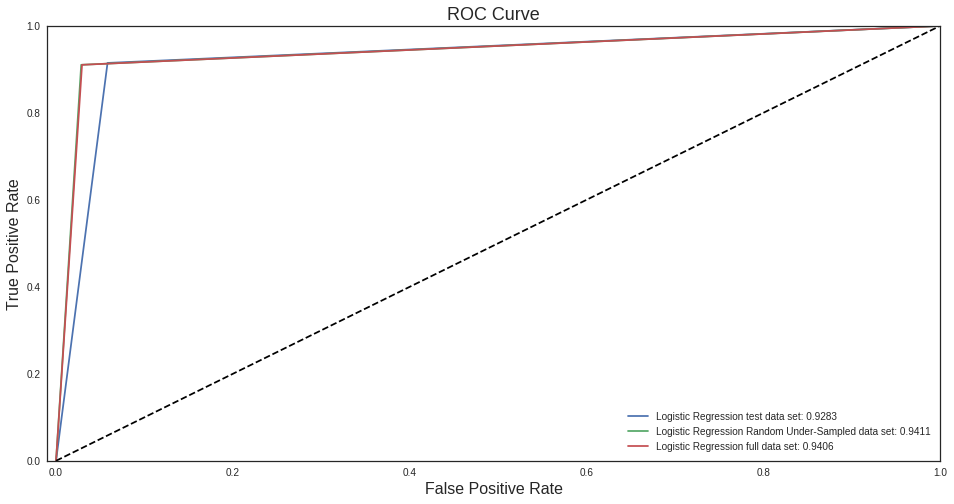

In [25]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(log_test_fpr, log_test_tpr, label='Logistic Regression test data set: {:.4f}'.format(roc_auc_score(Y_test, Y_pred_test)))
plt.plot(log_rm_fpr, log_rm_tpr, label='Logistic Regression Random Under-Sampled data set: {:.4f}'.format(roc_auc_score(Y, Y_pred)))
plt.plot(log_full_fpr, log_full_tpr, label='Logistic Regression full data set: {:.4f}'.format(roc_auc_score(Y_full, Y_pred_full)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

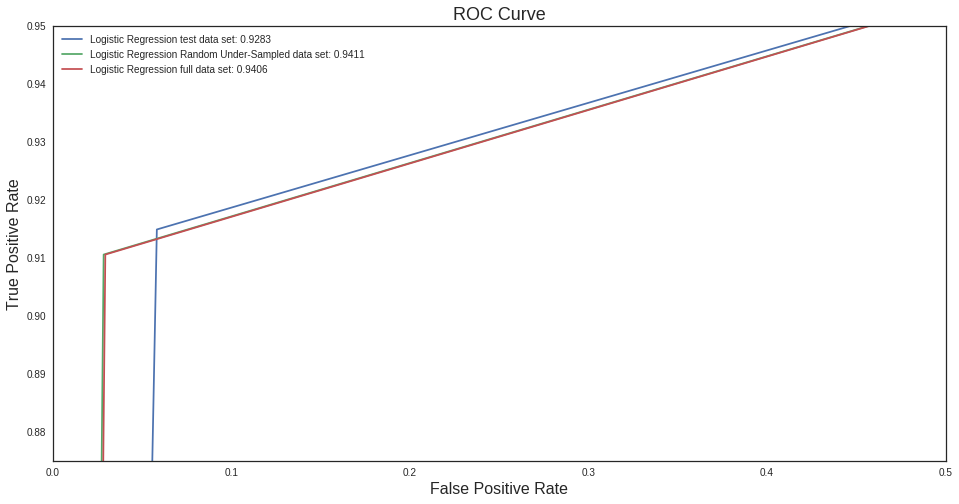

In [30]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(log_test_fpr, log_test_tpr, label='Logistic Regression test data set: {:.4f}'.format(roc_auc_score(Y_test, Y_pred_test)))
plt.plot(log_rm_fpr, log_rm_tpr, label='Logistic Regression Random Under-Sampled data set: {:.4f}'.format(roc_auc_score(Y, Y_pred)))
plt.plot(log_full_fpr, log_full_tpr, label='Logistic Regression full data set: {:.4f}'.format(roc_auc_score(Y_full, Y_pred_full)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(0, 0.5)
plt.ylim(0.875, 0.95)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

## Future Research

For future research, I will look into different classification models, like KNN, random forest, SVM, and compare their performance using cross validation and confusion matrix. Also, GridSearchCV will come in handy for hyper parameters tuning. The goal for our future research is to reduce the number of error that classified fraud transaction as non-fraud transaction. 